In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

import pickle

from gformula_simu import g_formula_parametric, true_value_scenario_2,IPW
from data_generation.simu_data_scenario_2 import simulate


from pathlib import Path


In [2]:

params = dict( {"mu": 6, "s" : 4, "beta_dict" : dict({"beta_0" : [1,0.5,2,1], "beta_1" : [1, 0.5, 1, 0.8], "beta_2" : [1, 0.5, 0.2, 1.2]}), 
            "omega_dict": dict({"omega_0" : [0, 0.5, 0.2], "omega_1": [0, 0.5, 0.4], "omega_2" : [0, 0.5, 0.8]}),
            "sigma2_dict": dict({"pop0" :0.12  , "pop1" :0.12 , "pop2": 0.12})  })



data_all = simulate(10000,**params,  seed=3)


no true value computed


In [3]:
data_all[1]

,C,POP,A,M,Y
0,14.163676,pop1,1,1,9.712177
1,-4.222660,pop1,0,0,-0.690108
3,3.728922,pop1,0,0,2.777347
5,5.137611,pop1,0,1,4.370200
6,-2.079945,pop1,0,1,0.883010
...,...,...,...,...,...
9991,-2.384105,pop1,1,0,0.332297
9992,0.559221,pop1,0,1,2.066587
9993,2.407045,pop1,1,0,3.527499
9995,3.785946,pop1,1,1,5.079917


In [4]:
data_all[2]

,C,POP,A,M,Y
9,19.291998,pop2,0,1,11.157966
33,8.321400,pop2,0,0,4.858511
57,-3.975577,pop2,0,0,-1.279170
94,1.003612,pop2,0,1,2.167734
99,6.862603,pop2,1,1,6.022561
...,...,...,...,...,...
9920,6.624135,pop2,1,1,5.700399
9924,3.119710,pop2,0,1,2.473979
9933,2.217433,pop2,1,1,3.682327
9944,17.601874,pop2,1,1,11.273611


In [5]:
data_all[0]

,C,POP,A,M,Y
2,7.672395,pop0,1,1,7.766116
4,4.189403,pop0,0,1,5.088175
7,5.072270,pop0,0,1,5.798210
10,6.903146,pop0,0,1,5.953951
12,4.874850,pop0,0,0,3.761795
...,...,...,...,...,...
9989,2.606399,pop0,1,1,4.820371
9994,10.246375,pop0,0,1,7.770912
9996,10.175768,pop0,1,1,9.160441
9998,7.868567,pop0,1,1,8.543606


In [6]:
data = pd.concat([data_all[i] for i in range(3)])

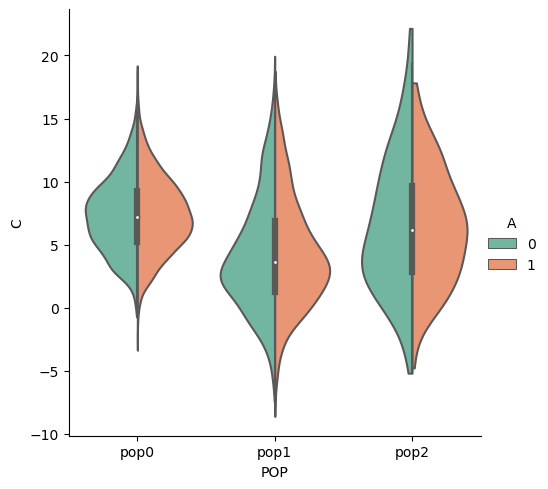

In [7]:
import seaborn as sns


sns.catplot(data=data, y='C', x="POP", hue = "A", kind="violin", bw_adjust=.5, cut=0, split=True,palette="Set2") 

<Axes: xlabel='C', ylabel='Density'>

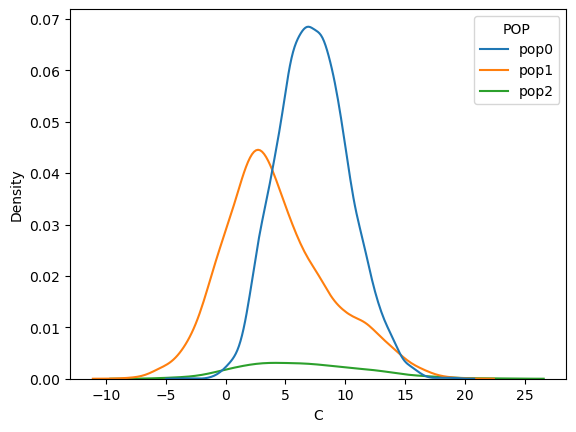

In [8]:
sns.kdeplot(data=data, x="C", hue="POP")

<Axes: xlabel='C', ylabel='Density'>

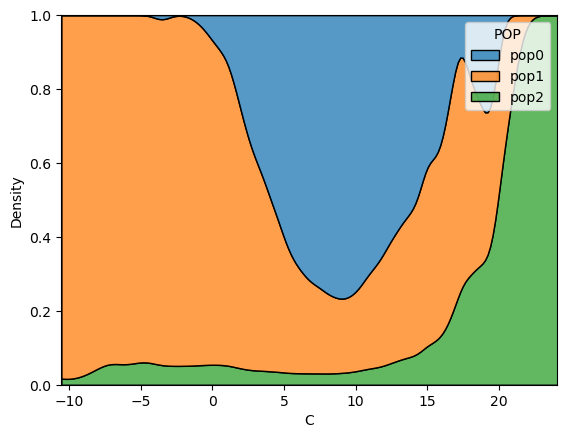

In [9]:
sns.kdeplot(data=data, x="C", hue="POP", multiple="fill")